In [ ]:
### Task 1

In [ ]:
#Setting seed for reproducibility and check TensorFlow version
import tensorflow as tf

tf.keras.utils.set_random_seed(3311791)
tf.__version__

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.12.0'

In [ ]:
#Plain mnist_mlp.py from https://github.com/keras-team/keras/blob/tf-keras-2/examples/mnist_mlp.py#L22
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
____________

In [ ]:
#Visualization of accuracy, loss and architecture
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
def visualize(model, history, epochs=20, filename='model.png', title=None):
    tf.keras.backend.clear_session() # reset layer counter

    pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, epochs-1], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
    plt.title(title)
    plt.show()
    return plot_model(model, filename, show_shapes=True, show_layer_names=True)

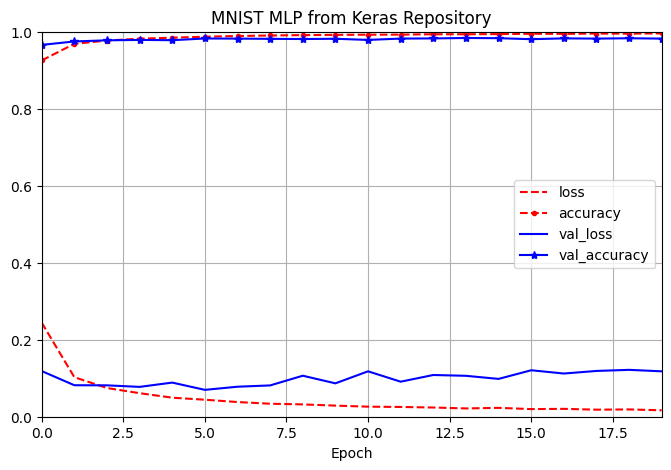

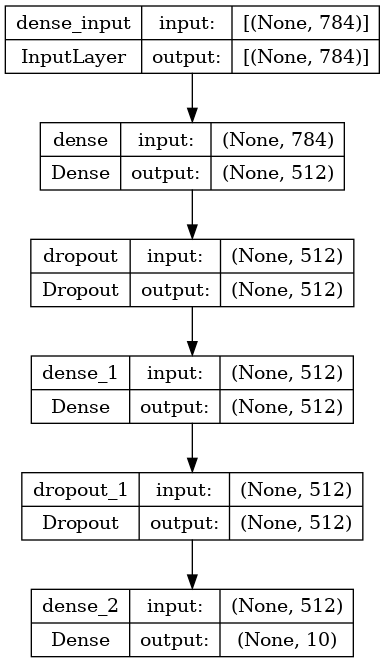

In [ ]:
visualize(model, history, title='MNIST MLP from Keras Repository')

In [ ]:
#Experimenting with the MLP: remove Dropout layers
def mlp_keras(num_dense=512, epochs=20, batch_size=128, title=None):
    keras.backend.clear_session() # reset layer name count
    model = Sequential()
    model.add(Dense(num_dense, activation='relu', input_shape=(784,)))
    model.add(Dense(num_dense, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
 #   visualize(model, history, title=title)
    return model, history
model2, history2 = mlp_keras() # Dropout layers removed
model3, history3 = mlp_keras(num_dense=100) # Neurons in Dense hidden layers reduced
model4, history4 = mlp_keras(batch_size=16) # Batch size reduced

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2191 - accuracy: 0.9325 - val_loss: 0.1102 - val_accuracy: 0.9663
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0767 - val_accuracy: 0.9780
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0802 - val_accuracy: 0.9782
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0893 - val_accuracy: 0.9777
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0851 - val_accuracy: 0.9822
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0801 - val_accuracy: 0.9836
Epoch 

In [ ]:
#Plain mnist_cnn.py from https://github.com/keras-team/keras/blob/tf-keras-2/examples/mnist_cnn.py
# low accuracy across different GPUs etc. (code outdated)
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12


2023-11-08 13:11:57.006270: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 8s 8ms/step - loss: 2.2660 - accuracy: 0.1896 - val_loss: 2.2248 - val_accuracy: 0.4697
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1995 - accuracy: 0.3176 - val_loss: 2.1414 - val_accuracy: 0.5597
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1125 - accuracy: 0.4058 - val_loss: 2.0319 - val_accuracy: 0.6136
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 2.0021 - accuracy: 0.4683 - val_loss: 1.8928 - val_accuracy: 0.6505
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 1.8653 - accuracy: 0.5180 - val_loss: 1.7236 - val_accuracy: 0.6841
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 1.7085 - accuracy: 0.5552 - val_loss: 1.5332 - val_accuracy: 0.7087
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 1.5464 - accuracy: 0.5882 - val_loss: 1.3417 - val_accuracy: 0.7343
Epoch 8/12
469/46

In [ ]:
#Experimenting with the official Keras CNN (outdated)
def cnn_keras(epochs=12, first_kernel_size=3, second_kernel_size=2, padding='valid', title=None):
    keras.backend.clear_session() # reset layer name count
    model = Sequential()
    model.add(Conv2D(32, kernel_size=first_kernel_size, padding=padding,
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(64, second_kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # kernel_initializer="he_normal"
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
#    visualize(model, history)
    return model, history
model5, history5 = cnn_keras() # default
model6, history6 = cnn_keras(padding='same')
model7, history7 = cnn_keras(first_kernel_size=5, second_kernel_size=3, padding='same')
# signigicantly less test accuracy for all models than what was promised

Epoch 1/12
 21/469 [>.............................] - ETA: 2s - loss: 2.3025 - accuracy: 0.1064

2023-11-08 13:12:39.269721: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 3s 6ms/step - loss: 2.2841 - accuracy: 0.1465 - val_loss: 2.2547 - val_accuracy: 0.2592
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 2.2372 - accuracy: 0.2402 - val_loss: 2.1981 - val_accuracy: 0.4389
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1795 - accuracy: 0.3308 - val_loss: 2.1283 - val_accuracy: 0.5614
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1071 - accuracy: 0.4182 - val_loss: 2.0387 - val_accuracy: 0.6439
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 2.0136 - accuracy: 0.4866 - val_loss: 1.9244 - val_accuracy: 0.7010
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 1.8980 - accuracy: 0.5401 - val_loss: 1.7833 - val_accuracy: 0.7395
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 1.7591 - accuracy: 0.5755 - val_loss: 1.6159 - val_accuracy: 0.7616
Epoch 8/12
469/46

2023-11-08 13:13:21.893783: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 4s 7ms/step - loss: 2.2669 - accuracy: 0.1828 - val_loss: 2.2187 - val_accuracy: 0.5002
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 2.1892 - accuracy: 0.3250 - val_loss: 2.1214 - val_accuracy: 0.6315
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 2.0900 - accuracy: 0.4347 - val_loss: 1.9981 - val_accuracy: 0.6937
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 1.9643 - accuracy: 0.5079 - val_loss: 1.8449 - val_accuracy: 0.7264
Epoch 5/12
469/469 [==============================] - 3s 6ms/step - loss: 1.8155 - accuracy: 0.5577 - val_loss: 1.6632 - val_accuracy: 0.7419
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 1.6482 - accuracy: 0.5903 - val_loss: 1.4672 - val_accuracy: 0.7592
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 1.4830 - accuracy: 0.6193 - val_loss: 1.2777 - val_accuracy: 0.7731
Epoch 8/12
469/46

2023-11-08 13:13:58.723889: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 4s 8ms/step - loss: 2.2844 - accuracy: 0.1531 - val_loss: 2.2544 - val_accuracy: 0.4042
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 2.2323 - accuracy: 0.2999 - val_loss: 2.1899 - val_accuracy: 0.5982
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 2.1622 - accuracy: 0.4247 - val_loss: 2.0994 - val_accuracy: 0.6646
Epoch 4/12
469/469 [==============================] - 3s 7ms/step - loss: 2.0655 - accuracy: 0.5020 - val_loss: 1.9757 - val_accuracy: 0.7046
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 1.9350 - accuracy: 0.5578 - val_loss: 1.8119 - val_accuracy: 0.7418
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 1.7697 - accuracy: 0.5930 - val_loss: 1.6050 - val_accuracy: 0.7774
Epoch 7/12
469/469 [==============================] - 3s 7ms/step - loss: 1.5791 - accuracy: 0.6279 - val_loss: 1.3754 - val_accuracy: 0.7969
Epoch 8/12
469/46

In [ ]:
#demo_mnist_convnet.py from official keras repo (only 2 months since last update)
# https://github.com/keras-team/keras/blob/master/examples/demo_mnist_convnet.py
import numpy as np
import keras
from keras import layers
from keras.utils import to_categorical

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
epochs = 3

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/3
422/422 [==============================] - 4s 4ms/step - loss: 0.3691 - accuracy: 0.8873 - val_loss: 0.0796 - val_accuracy: 0.9773
Epoch 2/3
422/422 [==============================] - 2s 4ms/step - loss: 0.1114 - accuracy: 0.9656 - val_loss: 0.0584 - val_accuracy: 0.9840
Epoch 3/3
422/422 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9737 - val_loss: 0.0446 - val_accuracy: 0.9878
Test loss: 0.0481509305536747
Test accuracy: 0.9843000173568726


In [ ]:
#Experimenting with the official up-to-date Keras CNN
def cnn_keras(epochs=3, batch_size=128, first_kernel_size=3, second_kernel_size=3,
                  padding='valid', optimizer="adam", add_dropout=None, add_dense=None,
                  max_pooling2d=(2, 2), title=None):
    keras.backend.clear_session() # reset layer name count

    model = keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=first_kernel_size, activation="relu", padding=padding),
        ]
    )

    if max_pooling2d is not None:
        model.add(layers.MaxPooling2D(pool_size=max_pooling2d))

    model.add(layers.Conv2D(64, kernel_size=second_kernel_size, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    if add_dropout is not None:
        model.add(Dropout(add_dropout))

    model.add(layers.Flatten())

    if add_dense is not None:
        model.add(Dense(add_dense, activation="relu"))

    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    history = model.fit(
        x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
    )

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
 #   visualize(model, history, epochs=epochs)
    return model, history

model5, history5 = cnn_keras() # updated keras model
model6, history6 = cnn_keras(padding='same')
model62, history62 = cnn_keras(padding='same', max_pooling2d=None)
model7, history7 = cnn_keras(first_kernel_size=5, second_kernel_size=3, padding='same')
model8, history8 = cnn_keras(add_dropout=0.25, add_dense=128, optimizer=keras.optimizers.Adadelta(), max_pooling2d=None)
model9, history9 = cnn_keras(add_dense=128, optimizer=keras.optimizers.Adadelta(), max_pooling2d=None)
model10, history10 = cnn_keras(add_dense=128, optimizer=keras.optimizers.Adadelta(), max_pooling2d=None)
model11, history11 = cnn_keras(optimizer=keras.optimizers.Adadelta())

Epoch 1/3
422/422 [==============================] - 3s 4ms/step - loss: 0.3724 - accuracy: 0.8863 - val_loss: 0.0806 - val_accuracy: 0.9790
Epoch 2/3
422/422 [==============================] - 2s 4ms/step - loss: 0.1120 - accuracy: 0.9666 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 3/3
422/422 [==============================] - 2s 4ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0459 - val_accuracy: 0.9865
Test loss: 0.04902886226773262
Test accuracy: 0.984000027179718
Epoch 1/3
422/422 [==============================] - 3s 4ms/step - loss: 0.3542 - accuracy: 0.8895 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 2/3
422/422 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9688 - val_loss: 0.0553 - val_accuracy: 0.9853
Epoch 3/3
422/422 [==============================] - 2s 4ms/step - loss: 0.0795 - accuracy: 0.9752 - val_loss: 0.0430 - val_accuracy: 0.9872
Test loss: 0.045626215636730194
Test accuracy: 0.9853000044822693
Epoch 1/3
422/422 [=====

2023-11-08 13:15:22.966906: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


422/422 [==============================] - 3s 7ms/step - loss: 2.2835 - accuracy: 0.1449 - val_loss: 2.2463 - val_accuracy: 0.3795
Epoch 2/3
422/422 [==============================] - 3s 6ms/step - loss: 2.2276 - accuracy: 0.2603 - val_loss: 2.1776 - val_accuracy: 0.5702
Epoch 3/3
422/422 [==============================] - 3s 6ms/step - loss: 2.1600 - accuracy: 0.3555 - val_loss: 2.0898 - val_accuracy: 0.6270
Test loss: 2.096517324447632
Test accuracy: 0.5720000267028809
Epoch 1/3
422/422 [==============================] - 3s 6ms/step - loss: 2.2910 - accuracy: 0.1268 - val_loss: 2.2708 - val_accuracy: 0.1703
Epoch 2/3
422/422 [==============================] - 2s 5ms/step - loss: 2.2578 - accuracy: 0.2111 - val_loss: 2.2329 - val_accuracy: 0.3152
Epoch 3/3
422/422 [==============================] - 2s 5ms/step - loss: 2.2174 - accuracy: 0.3190 - val_loss: 2.1822 - val_accuracy: 0.5093
Test loss: 2.1893677711486816
Test accuracy: 0.38960000872612
Epoch 1/3
422/422 [====================

In [ ]:
visualize(model8, history8, epochs=3)

In [ ]:
## Part 2
# MLP

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-6000], y_train_full[:-6000]
X_valid, y_valid = X_train_full[-6000:], y_train_full[-6000:] # 10% of training set as validation

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, X_test.shape, X_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(54000, 28, 28) (10000, 28, 28) (6000, 28, 28)
(54000,) (10000,) (6000,)


In [ ]:
#Scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

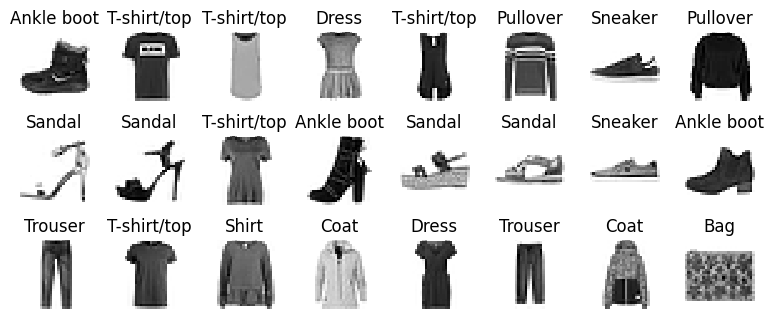

In [ ]:
#Display sample of Fashion MNIST images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.savefig("fashion_mnist_sample.png")
plt.show()

In [ ]:
keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid))
history.params
model.evaluate(X_test, y_test)

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7241 - accuracy: 0.7663 - val_loss: 0.5266 - val_accuracy: 0.8167
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4881 - accuracy: 0.8310 - val_loss: 0.4679 - val_accuracy: 0.8295
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4430 - accuracy: 0.8456 - val_loss: 0.4157 - val_accuracy: 0.8512
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8550 - val_loss: 0.4519 - val_accuracy: 0.8405
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8628 - val_loss: 0.3981 - val_accuracy: 0.8593
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3788 - accuracy: 0.8677 - val_loss: 0.4063 - val_accuracy: 0.8567
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8714 - val_loss: 0.3796 - val_accuracy:

[0.32788342237472534, 0.883899986743927]

In [ ]:
%pip install -q -U keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import regularizers

def build_mlp(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam", "Adadelta", "nadam"])
    activation = hp.Choice("activation", values=["relu", "tanh", "elu"])
    initializer = hp.Choice("initializer", values=["glorot_uniform", "he_uniform"])
    dropout_rate = hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1)
    l1_reg = hp.Float("l1_reg", min_value=0.0, max_value=0.1, step=0.01)
    l2_reg = hp.Float("l2_reg", min_value=0.0, max_value=0.1, step=0.01)

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer == "Adadelta":
        optimizer = "Adadelta"
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation, kernel_initializer=initializer,
                                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model


In [ ]:
random_search_tuner = kt.RandomSearch(
    build_mlp, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 45s]
val_accuracy: 0.6343333125114441

Best val_accuracy So Far: 0.7923333048820496
Total elapsed time: 00h 11m 00s


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [ ]:
#best_model.fit(X_train, y_train, epochs=30)

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 2,
 'n_neurons': 231,
 'learning_rate': 0.0043925333029596605,
 'optimizer': 'sgd',
 'activation': 'elu',
 'initializer': 'he_uniform',
 'dropout_rate': 0.2,
 'l1_reg': 0.0,
 'l2_reg': 0.05}

In [ ]:
print(top3_params[1].values)
print(top3_params[2].values)

{'n_hidden': 2, 'n_neurons': 135, 'learning_rate': 0.007177664122743156, 'optimizer': 'adam', 'activation': 'tanh', 'initializer': 'glorot_uniform', 'dropout_rate': 0.0, 'l1_reg': 0.0, 'l2_reg': 0.08}
{'n_hidden': 5, 'n_neurons': 25, 'learning_rate': 0.0006562536901904111, 'optimizer': 'adam', 'activation': 'elu', 'initializer': 'glorot_uniform', 'dropout_rate': 0.2, 'l1_reg': 0.0, 'l2_reg': 0.05}


In [ ]:
#top 3 hypertuned models
top3_trials = random_search_tuner.oracle.get_best_trials(num_trials=3)
print(top3_trials[0].metrics.get_last_value("val_accuracy"))
print(top3_trials[1].metrics.get_last_value("val_accuracy"))
print(top3_trials[2].metrics.get_last_value("val_accuracy"))


0.7923333048820496
0.7406666874885559
0.6936666369438171


In [ ]:
## MLP CIFAR-10 test

In [ ]:
import keras
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()



170498071/170498071 [==============================] - 3s 0us/step


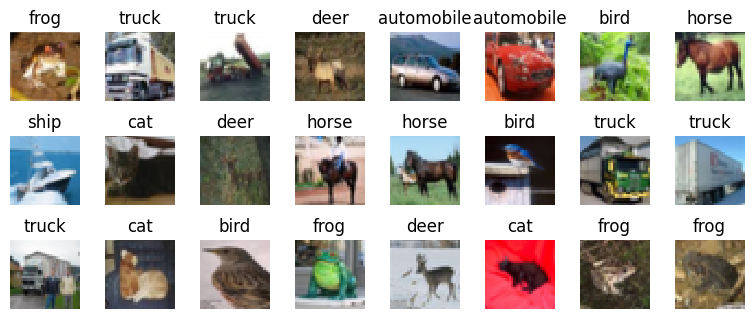

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_cifar[index], cmap="viridis", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_cifar[index][0]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.savefig("cifar_10_sample.png")
plt.show()


In [ ]:
X_train_cifar, X_test_cifar = X_train_cifar / 255, X_test_cifar / 255
print("X_train shape:", X_train_cifar.shape)
print(X_train_cifar.shape[0], "train samples")
print(X_test_cifar.shape[0], "test samples")

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
print(X_train_cifar.shape, X_test_cifar.shape)
print(y_train_cifar.shape, y_test_cifar.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers

def mlp_cifar(parameters):
    if parameters["optimizer"] == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=parameters["learning_rate"])
    elif parameters["optimizer"] == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=parameters["learning_rate"])
    elif parameters["optimizer"] == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=parameters["learning_rate"])
    else:
        optimizer = "Adadelta"

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    for _ in range(parameters['n_hidden']):
        model.add(tf.keras.layers.Dense(parameters['n_neurons'], activation=parameters['activation'], kernel_initializer=parameters['initializer'],
                                        kernel_regularizer=regularizers.l1_l2(l1=parameters['l1_reg'], l2=parameters['l2_reg'])))
        model.add(tf.keras.layers.Dropout(parameters['dropout_rate']))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model


mlp1 = mlp_cifar(top3_params[0].values)
mlp2 = mlp_cifar(top3_params[1].values)
mlp3 = mlp_cifar(top3_params[2].values)

In [ ]:
mlp1.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss1, test_accuracy1 = mlp1.evaluate(X_test_cifar, y_test_cifar)
mlp2.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss2, test_accuracy2 = mlp2.evaluate(X_test_cifar, y_test_cifar)
mlp3.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss3, test_accuracy3 = mlp3.evaluate(X_test_cifar, y_test_cifar)

print(test_accuracy1, test_accuracy2, test_accuracy3)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 27.1408 - accuracy: 0.2906
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 8.3381 - accuracy: 0.3392
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 3.6174 - accuracy: 0.3409
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.4207 - accuracy: 0.3380
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1125 - accuracy: 0.3407
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0296 - accuracy: 0.3392
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0045 - accuracy: 0.3370
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9931 - accuracy: 0.3387
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9881 - accuracy: 0.3391
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.9674

In [ ]:
# CNN

In [ ]:
## Baseline model
from functools import partial

keras.backend.clear_session()
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1688/1688 [==============================] - 18s 8ms/step - loss: 0.7183 - accuracy: 0.7434 - val_loss: 0.3710 - val_accuracy: 0.8602
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4246 - accuracy: 0.8544 - val_loss: 0.3173 - val_accuracy: 0.8858
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3657 - accuracy: 0.8769 - val_loss: 0.3076 - val_accuracy: 0.8898
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3198 - accuracy: 0.8896 - val_loss: 0.2818 - val_accuracy: 0.9003
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2929 - accuracy: 0.9001 - val_loss: 0.2873 - val_accuracy: 0.8957
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2736 - accuracy: 0.9072 - val_loss: 0.2872 - val_accuracy: 0.8987
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2575 - accuracy: 0.9114 - val_loss: 0.2762 - val_ac

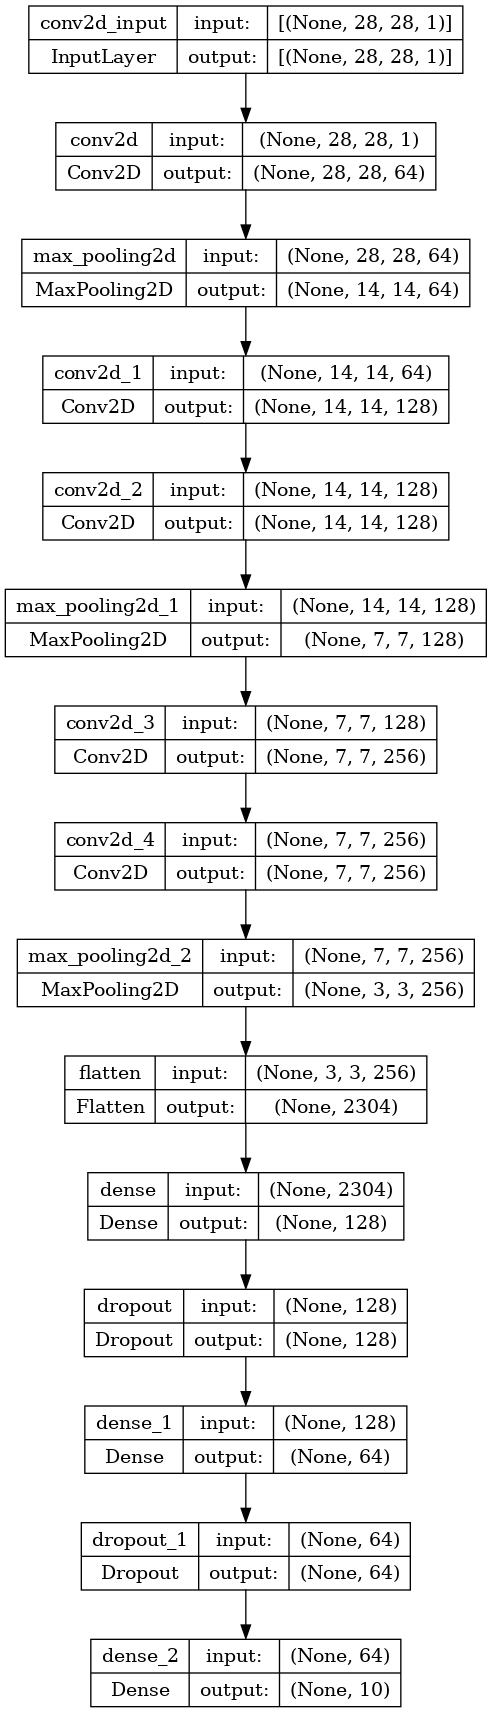

In [ ]:
plot_model(model, "geron_cnn.png", show_shapes=True, show_layer_names=True)

In [ ]:
# Build model for tuning

from functools import partial
def build_cnn(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam", "Adadelta", "nadam"])
    activation = hp.Choice("activation", values=["relu", "tanh", "elu"])
    initializer = hp.Choice("initializer", values=["glorot_uniform", "he_uniform"])
    dropout_rate = hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1)
    l1_reg = hp.Float("l1_reg", min_value=0.0, max_value=0.1, step=0.01)
    l2_reg = hp.Float("l2_reg", min_value=0.0, max_value=0.1, step=0.01)

    if optimizer == "sgd": # adadelta has no learning rate hyperparameter
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

    model = keras.models.Sequential()

    model.add(DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(DefaultConv2D(filters=128))
    model.add(DefaultConv2D(filters=128))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(DefaultConv2D(filters=256))
    model.add(DefaultConv2D(filters=256))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation=activation, kernel_initializer=initializer,
                                        kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(units=10, activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_cnn, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_fashion_mnist2", project_name="my_rnd_search2", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 34s]
val_accuracy: 0.7576666474342346

Best val_accuracy So Far: 0.9104999899864197
Total elapsed time: 00h 20m 10s


In [ ]:
top3_cnns = random_search_tuner.get_best_models(num_models=3)
best_cnn = top3_cnns[0]

In [ ]:
#top 3 hypertuned models
top3_trials_cnn = random_search_tuner.oracle.get_best_trials(num_trials=3)
print(top3_trials_cnn[0].metrics.get_last_value("val_accuracy"))
print(top3_trials_cnn[1].metrics.get_last_value("val_accuracy"))
print(top3_trials_cnn[2].metrics.get_last_value("val_accuracy"))

0.9104999899864197
0.8818333148956299
0.8526666760444641


In [ ]:
best_cnns = random_search_tuner.get_best_hyperparameters(num_trials=3)
best_cnns[0].values

{'n_hidden': 2,
 'n_neurons': 251,
 'learning_rate': 0.001715074355925934,
 'optimizer': 'nadam',
 'activation': 'relu',
 'initializer': 'he_uniform',
 'dropout_rate': 0.0,
 'l1_reg': 0.06,
 'l2_reg': 0.02}

In [ ]:
print(best_cnns[1].values)
print(best_cnns[2].values)

{'n_hidden': 5, 'n_neurons': 25, 'learning_rate': 0.0006562536901904111, 'optimizer': 'adam', 'activation': 'elu', 'initializer': 'glorot_uniform', 'dropout_rate': 0.2, 'l1_reg': 0.0, 'l2_reg': 0.05}
{'n_hidden': 3, 'n_neurons': 62, 'learning_rate': 0.0005161743428272905, 'optimizer': 'adam', 'activation': 'relu', 'initializer': 'he_uniform', 'dropout_rate': 0.0, 'l1_reg': 0.1, 'l2_reg': 0.1}


In [ ]:
def cnn_cifar(params):
    if params["optimizer"] == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=params["learning_rate"])
    elif params["optimizer"] == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=params["learning_rate"])
    elif params["optimizer"] == "nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=params["learning_rate"])
    else:
        optimizer = "Adadelta"
    DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

    model = keras.models.Sequential()

    model.add(DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(DefaultConv2D(filters=128))
    model.add(DefaultConv2D(filters=128))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(DefaultConv2D(filters=256))
    model.add(DefaultConv2D(filters=256))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(keras.layers.Flatten())

    for _ in range(params['n_hidden']):
        model.add(tf.keras.layers.Dense(params['n_neurons'], activation=params['activation'], kernel_initializer=params['initializer'],
                                        kernel_regularizer=regularizers.l1_l2(l1=params['l1_reg'], l2=params['l2_reg'])))
        model.add(tf.keras.layers.Dropout(params['dropout_rate']))

    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


    return model

cnn1 = cnn_cifar(best_cnns[0].values)
cnn2 = cnn_cifar(best_cnns[1].values)
cnn3 = cnn_cifar(best_cnns[2].values)

In [ ]:

cnn1.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss4, test_accuracy4 = cnn1.evaluate(X_test_cifar, y_test_cifar)

cnn2.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss5, test_accuracy5 = cnn2.evaluate(X_test_cifar, y_test_cifar)

cnn3.fit(X_train_cifar, y_train_cifar, epochs=10)
test_loss6, test_accuracy6 = cnn3.evaluate(X_test_cifar, y_test_cifar)


Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 27.3945 - accuracy: 0.0992
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2605 - accuracy: 0.0980
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2558 - accuracy: 0.0992
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2569 - accuracy: 0.0981
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2569 - accuracy: 0.1006
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2570 - accuracy: 0.0984
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2569 - accuracy: 0.0977
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 12.2570 - accuracy: 0.0981
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 12.2569 - accuracy: 0.0987
Epoch 10/10
313/313 [==============================] - 1s 3ms/st

In [ ]:
print(test_accuracy4, test_accuracy5, test_accuracy6)

0.10000000149011612 0.41449999809265137 0.41990000009536743
